# Project : Wine Review Data Analysis

### by Huy Luu




## Table of Contents
- [Part 1 - Introduction]
- [Part 2 - Exploratory Data Analysis]
- [Part 3 - Conclusions]



<a id='intro'></a>
## Part 1 - Introduction

The project's source :  https://www.kaggle.com/zynicide/wine-reviews containing approximately 130k reviews from the Wine Enthusiast to better understand: + Dataset's content: display about 130k wine reviews with variety, location, winery, price, and description of numerous type of wine in all over the world.
### Some implemting steps: 
1. General target and approaching ways
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## General target and approaching ways

With the experience of knowledge about the wine market, i really hope through this analysis i can give more choices about this products to those falling in love with this ones.
For this analysis and the related insights of this project, I just I wanted the chance to investigate the data and share my findings through a blog post on Medium.
Besides that, it is also the way which is hoped to be interesting and provide the reader with insight into the issues raised and help people know more about the wine's world and the potential market.
For my own view, i just want to analyze based on this analysis so as to answer these questions including:
####  - Where does the world's best wine was made?
#### - Whether sellers evaluate the wine's quality based on its price? 
####  - Are certain wines of a greater caliber than others? 
#### - What wine falls into each price range's top tier?

<a id='eda'></a>
## Exploratory Data Analysis

### Step 1 : Prepare Data

### Initially, the plan is just to import the essential libraries.

In [1]:
# import the necessary libraries and the related features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import other libraries
sns.set()
#from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
# read in the dataset and read via the dataframe
data_f = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
# print dataset and check the overview of the dataset (column, row, general information)
data_f

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [8]:
# Show all related values assesing of dataset (count, mean, std,...)
data_f.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
#display the all information of the columns (Non-null count, Dtype)
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### Evaluation: Clearly see that, we have 129971 rows and 14 columns.

### STEP 2  - Assessing the Data

### General information including:
The dataset contains approximately **29971 rows** and **14 columns** in the dataset. 
And its meaning: 
 - **unnamed:** an index column which can be removed
 - **country:** the country to make the wine 
 - **description:** The description of the wine
 - **designation:** the vineyard within the winery where the grapes that made the wine are from
 - **points:** the number of points the wine was scored in the review
 - **price:** the price of the bottle of wine
 - **province:** the province or state where the wine was made 
 - **region_1:** the region where the wine was made
 - **region_2:**  more specific regions specified within a wine growing area that we can remove this
 - **taster_name:** the name of the reviewer
 - **taster_twitter_handle:** the Twitter account that made the review
 - **title:** the name of the wine being reviewed. Interestingly the year is included here.
 - **variety:** the type of grapes used to make the wine
 - **winery:** the winery to make wine

In [10]:
# Pick about the sample data list with approximately 20 data records for genneral viewing
data_f.sample(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
90382,90382,US,"Ripe and softly smooth, this simple, affordabl...",NaN,86,13.0,California,Napa County,Napa,Virginie Boone,@vboone,Kirkland Signature 2014 Cabernet Sauvignon (Na...,Cabernet Sauvignon,Kirkland Signature
100046,100046,South Africa,A hint of spiced cured meat mixes with the ass...,NaN,89,28.0,Wellington,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bosman Family Vineyards 2007 Cabernet Sauvigno...,Cabernet Sauvignon,Bosman Family Vineyards
127245,127245,US,"Ethereally light and brisk on the palate, this...",Gridley Bluff Point Vineyard,87,25.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Silver Thread 2014 Gridley Bluff Point Vineyar...,Riesling,Silver Thread
72768,72768,France,This wine has all the tight minerality of the ...,La Garenne Premier Cru,93,100.0,Burgundy,Puligny-Montrachet,NaN,Roger Voss,@vossroger,Louis Latour 2014 La Garenne Premier Cru (Pul...,Chardonnay,Louis Latour
32475,32475,US,"Named for the proprietor's daughter, Taylor's ...",Taylor's Vineyard Musque Clone,90,28.0,California,Dry Creek Valley,Sonoma,Virginie Boone,@vboone,Dry Creek Vineyard 2014 Taylor's Vineyard Musq...,Sauvignon Blanc,Dry Creek Vineyard
21131,21131,US,"Chris Gorman is the winemaker for this pure, o...",Collaboration Series V Ciel du Cheval Vineyard,92,75.0,Washington,Red Mountain,Columbia Valley,Paul Gregutt,@paulgwine,Force Majeure 2010 Collaboration Series V Ciel...,Cabernet Sauvignon,Force Majeure
59370,59370,Italy,"Classic varietal aromas of hay, tomato vine an...",NaN,91,25.0,Northeastern Italy,Collio,NaN,Kerin O’Keefe,@kerinokeefe,Ronco Blanchis 2015 Sauvignon (Collio),Sauvignon,Ronco Blanchis
28133,28133,US,From a well-regarded vineyard that's source to...,Toulouse Vineyard,90,40.0,California,Anderson Valley,NaN,NaN,NaN,Phillips Hill 2006 Toulouse Vineyard Pinot Noi...,Pinot Noir,Phillips Hill
50937,50937,Spain,"Stalky aromas are a bit sweaty. In the mouth, ...",NaN,86,14.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Ostatu 2014 Rosado (Rioja),Rosado,Ostatu
31085,31085,Israel,Fairly young and needing some time to flesh ou...,Kosher Reserve Petit Syrah-Zinfandel,86,23.0,Galilee,NaN,NaN,Lauren Buzzeo,@laurbuzz,Recanati 2005 Kosher Reserve Petit Syrah-Zinfa...,Red Blend,Recanati


### Evaluation : with this above step, clearly see that we have the sample data for viewing.

In [12]:
# show the infomation about dataset (datatypes, null values)
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### Evaluation: 
+ There are a several columns with some missing data. 
+ Plan: remove columns namely **region_2, and taster_twitter_handle.** 

In [14]:
#Show the related values of the dataset
data_f.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


- Here we see the range of points given to a bottle of wine. The minimum is 80 and the max is 100. 
- The reference source : Utilizing the link here:https://www.wine-searcher.com/critics-17-wine+enthusiast I found that the Wine Enthusiast rates as below:

 - Classic : 98–100 
 - Superb : 94–97 
 - Excellent : 90–93 
 - Very good : 87–89 
 - Good : 83–86 
 - Acceptable : 80–82 

- We also see that the minimum price for a bottle of wine is about $4 which display the min price.

In [15]:
# look at the number of reviews for each wine region
data_f.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

### Evaluation: Clearly see that the majority of wine reviewed is from 5 countries including:
+ the US <br></br>
+ France <br></br>
+ Italy <br></br>
+ Spain <br></br>
+ Portugal 

In [16]:
# Show the description of dataset
data_f.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [17]:
# Show the "value_counts" of dataset
data_f.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Tsolikouri                      1
Tinta Negra Mole                1
Cercial                         1
Francisa                        1
Karasakiz                       1
Name: variety, Length: 707, dtype: int64

### Evaluation: nearly finish the 1st step, be ready for the next step : cleaning dataset

In [19]:
# Show the information (non-null, dtype,...)
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [21]:
# examning the duplicated rows in dataset
sum(data_f.duplicated())

0

#### Quality

 - Remove these columns including: 'Unnamed', 'region_2', ''taster_name','taster_twitter_handle', 'designation'.
 - In addition, it maybe contains some missing values in some columns 'country', 'price', 'province', 'variety', 'region_1'.


#### Tidiness

 - Title column has the year in it so could be made into a separate column

### STEP 3 - Cleaning Data

The first step of the cleaning process is to make a copy of the DataFrame. Then for each of the issues identified in the Assess stage we will go through the process of defining the issue and how to fix it, coding a fix, test that it worked.

In [22]:
# Firstly, just create a copy of dataset
data_f1 = data_f.copy()

#### Quality

 **'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped**

###### Define


In general, just eliminate the columns including : **'Unnamed: 0','region_2' and 'taster_twitter_handle'**.

###### Code

In [23]:
# Next, just remove some missing columns
data_f1 = data_f1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

##### Test

In [24]:
# Print and view the dataset after processing with the above step
data_f1

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


 ### Evaluation: there are some **Missing values in 'country', 'price', 'province', 'variety', 'region_1'**.


In [25]:
# Show the info of addressed dataset(non-null, dtype,...)
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [26]:
# next, show the proportion of price non null
prop_price = data_f1.price.count()/data_f1.shape[0]
prop_price

0.9307845596325334

In [28]:
# then, display the percentage of "region_1" non null 
prop_reg1 = data_f1.region_1.count()/data_f1.shape[0]
prop_reg1

0.8365250709773718

In [29]:
# next, show the number of missing rows for "region_1" column
missing_reg1 = 129971 - 108724 
missing_reg1

21247

### Evaluation: clearly see that the proportion of price non null, the percentage of "region_1" non null and the number of missing rows for "region_1" column are "0.9307845596325334","0.8365250709773718","21247" respectively. 

### Assessment: my view is that: 
Approximately 93% of the rows remain after null values in the price field are removed. I feel confident deleting these from such a large dataset. With the exception of Region 1, which has nearly 20,000 missing values, Price is the column with the most empty cells. <br></br>
The action: ignore this.

###### Define

The plan: just remove the rows missing namely **country, price, variety and province**.

##### Code

In [30]:
# Next, just remove only the rows with missing values in columns country, price, variety, province
data_f1 = data_f1.dropna(how='any', subset=['country', 'price', 'variety', 'province'])

##### Test

In [31]:
# Show the related info of dataset (non-null, dtype,...)
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


##### Tidiness

##### Define:
**The NEXT STEP : Extract the year from the title**

##### Code

In [32]:
# Extract the year from the title
data_f1['year'] = data_f1['title'].str.extract('(\d+)')

<ipython-input-32-203b085366e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f1['year'] = data_f1['title'].str.extract('(\d+)')


##### Test

In [33]:
# Print and show the dataset
data_f1

,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


### STEP 3 -  Analyse and Visualise
#### In this part, the main targets are just define the related questions and then explore the insights and give more evaluations.

### Question 1  -  In all over the world, so where does the world's best wine was produced?

In my view, as this is a feature relevant to my research, let's first examine the distribution of the points awarded to the wines in the dataset.

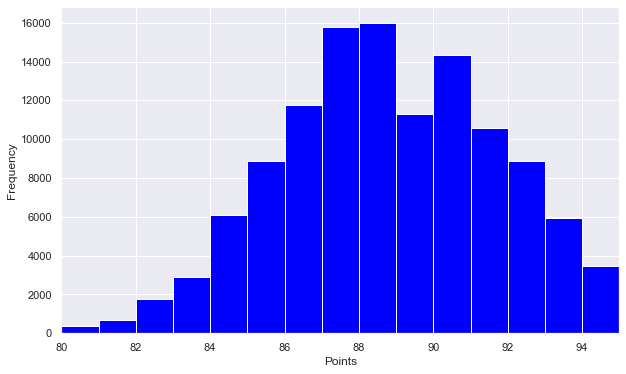

In [38]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (80, data_f1['points'].max()+1, 1)
plt.hist(data = data_f1, x = 'points', bins = bin_edges, color = 'blue')
plt.xlim(80,95)
plt.xlabel('Points')
plt.ylabel('Frequency');

### Evaluation : Via the above chart, clearly see that there is approximately a normal distribution of points ranging from 80-95. 

### First analysis: Let's check which countries are in the top 10 countries of produce the most wine.

In [39]:
# show the top 10 wine created most by which countries
country_most = data_f1.country.value_counts()[:10]

In [40]:
# print the list of top 10 contries
country_most

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

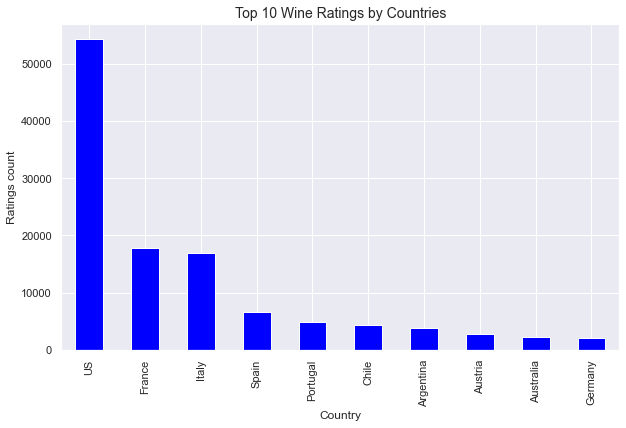

In [41]:
# plotting the countries with the most wine produced according to the dataset
plt.figure(figsize=(10,6))
country_most.plot(kind='bar', color = 'blue')
plt.title('Top 10 Wine Ratings by Countries', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Ratings count');

### Evaluation : Clearly see that the top 10 countries who produce the most wine are: US, France, Italy, Spain, Portugal, Chile, Argentina, Austria, Australia, and Germany. 
=> Next step, check how many countries produce wine of the best quality according to ratings.

In [43]:
# Next, group numerical variables by country 
data_f2 = data_f1.groupby('country').agg('mean')

In [44]:
# create df with 10 countries with most average points
data_f3 = data_f2.sort_values(by='points', ascending=False)[:10]

In [45]:
# print the dataset
data_f3

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


In [46]:
# next, just convert countries to series for showing on chart
y_vals = data_f3.index.to_series()

In [48]:
# next, just get points as the x-variable
x_vals = data_f3['points']
# print the list of contry for viewing
x_vals

country
England       91.550725
India         90.222222
Austria       90.190782
Germany       89.836321
Canada        89.377953
Hungary       89.165517
China         89.000000
France        88.734867
Luxembourg    88.666667
Italy         88.618186
Name: points, dtype: float64

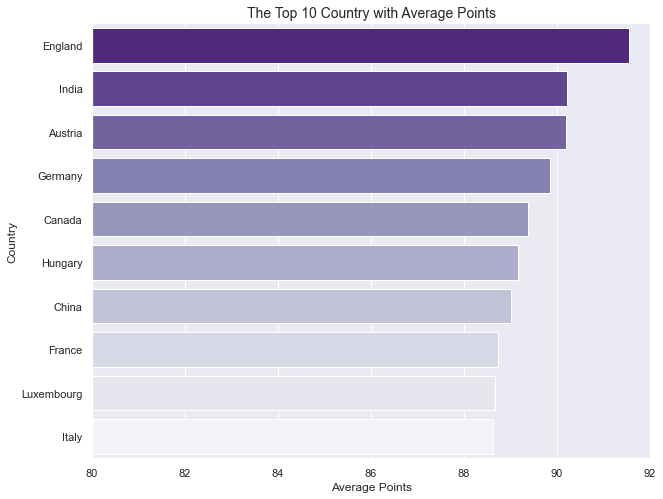

In [52]:
# Next, just plot "Top 10 Average points by countries"
plt.figure(figsize=(10,8))
plt.xlim(80, 92)
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('The Top 10 Country with Average Points', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

### Evaluation: Surprisingly, England produced the highest-quality wine when compared to the countries with the highest average points. This may be due to the fact that the dataset contains fewer wines from England, but those that do have high scores have an effect on the mean by raising it.

In [53]:
# Then, just view some related values of the dataset
data_f1.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [55]:
# Show the values of points >= 95 
high_scorers = data_f1[data_f1['points']>=95]
high_scorers

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006
128271,Spain,"Concentrated to the hilt, with molten black fr...",96,82.0,Northern Spain,Rioja,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza,2005
128682,US,Easy to like a lot now for its terrifically ri...,95,38.0,California,Russian River Valley,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate,2007
128683,US,"Big, powerful, soft, rich and ageable. In othe...",95,90.0,California,Carneros,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude,2006


In [56]:
# next, just show the number of wines from each country scoring the highest ratings of 95-100 points
high_scorers.country.value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

In [57]:
# then, display the number of wines from each country in the dataset
data_f1.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

#### Evauation: As can be seen from the chart above, the nations whose wines received scores between 95 and 100 points deviate from our plot of the top scorers based on averages. 

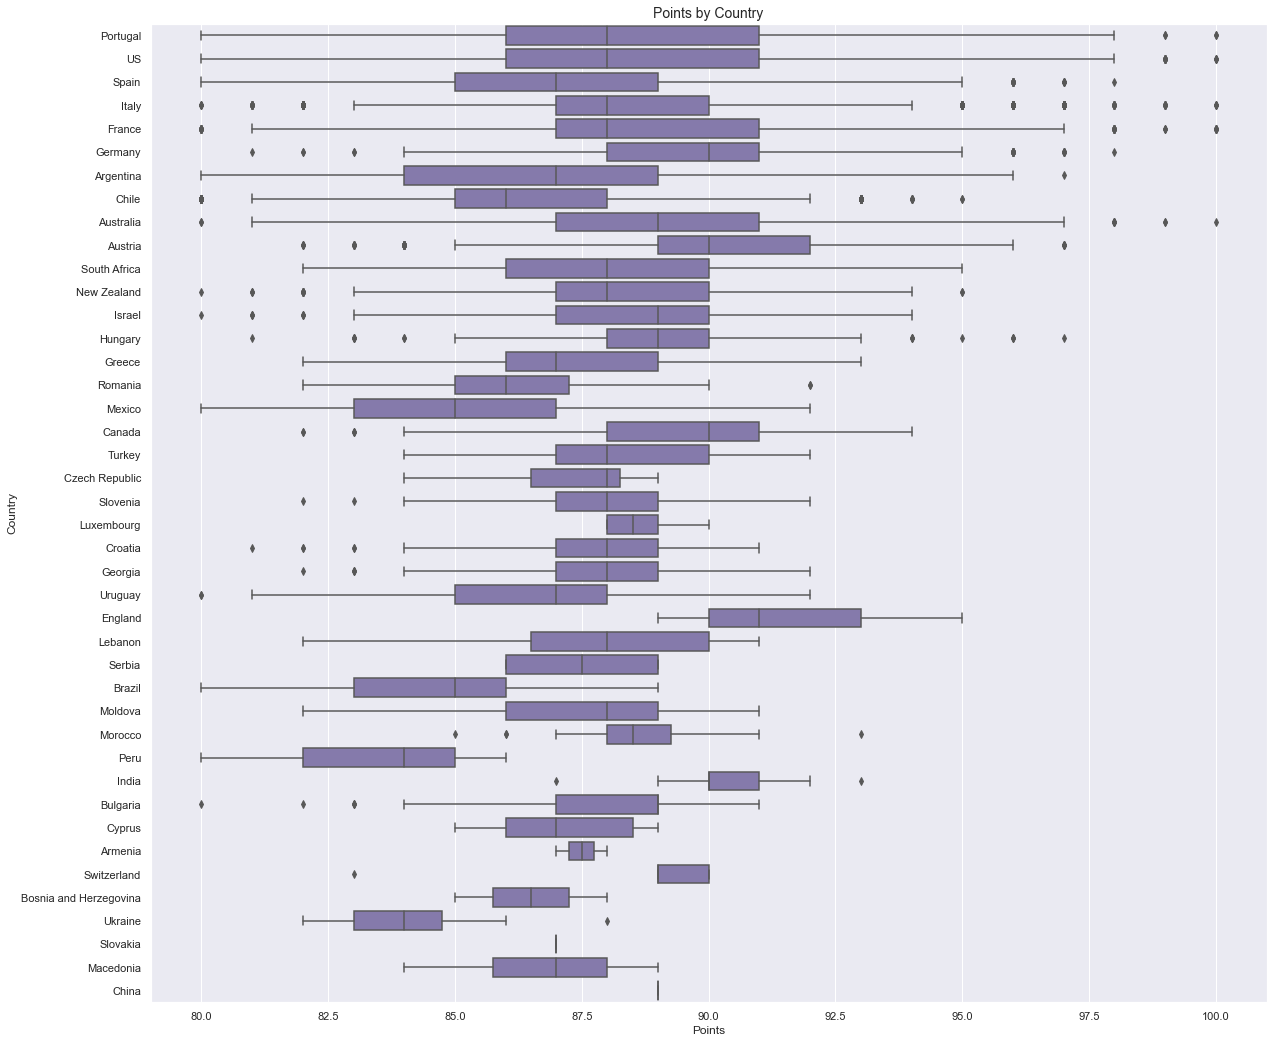

In [59]:
# Plot the related chart for analysing
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = data_f1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

### Evaluation: The boxplot above clearly demonstrates that while wines from England had the highest average scores, wines from Portugal, the US, Italy, France, and Australia produced wines that achieved the highest possible score of 100.

In [60]:
# Initially, just check the count of provinces (top 10)
wine_prov = data_f1.province.value_counts()[:10]

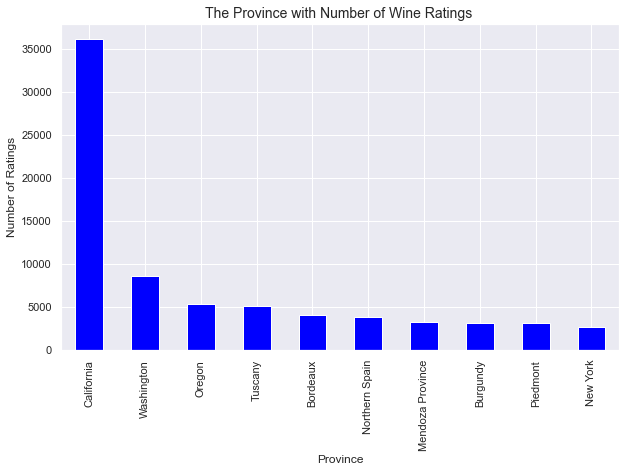

In [62]:
# then plot these values in chart
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = 'blue')
plt.title('The Province with Number of Wine Ratings ', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

### Exploration: California is, unsurprisingly, the most popular province in this dataset. Since the US received the most reviews, it was expected that California would have the most reviews of any state's wines.

Next step: investigate the price of wine from different countries. 

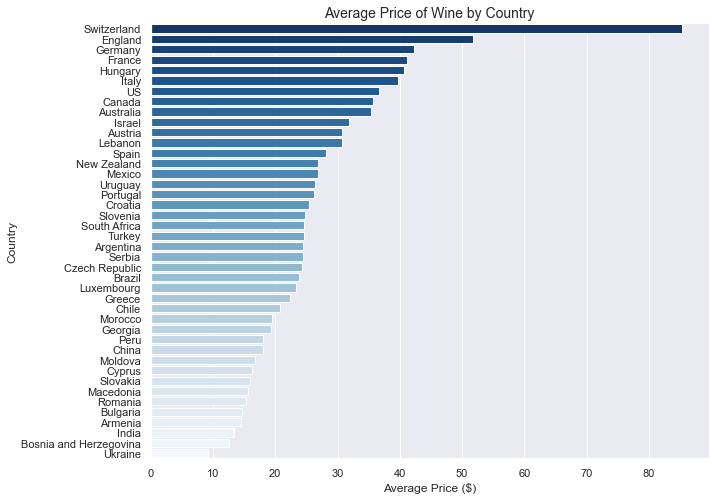

In [64]:
# plot the related values in chart
data_f4 = data_f1.groupby('country').agg('mean')
data_f5 = data_f4.sort_values(by='price', ascending=False)
y_val = data_f5.index.to_series()
x_val = data_f5['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='Blues_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

### Exploration : 
+ Firstly, clearly see that The most expensive wine is made in Switzerland, where a bottle of wine costs an average of more than "80 dollar". <br></br>
+ Next, On the other end of the scale, Ukrainian wine has an average cost of less than $10 per bottle.

### Question 2  -   Whether sellers evaluate the wine's quality based on its price?

#### Initially, the plan is just make some looks at the distribution figure of wine prices in the market

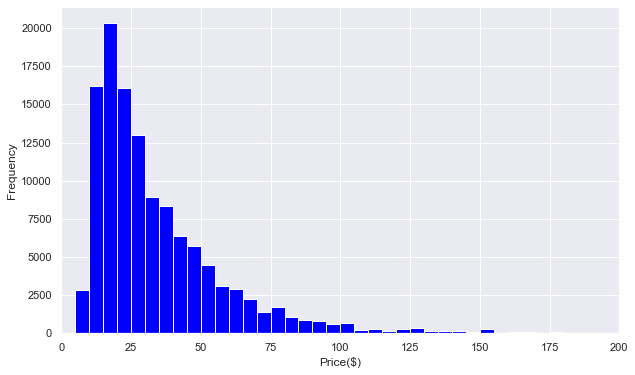

In [67]:
# Firstly, just plot price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, data_f1['price'].max()+5, 5)
plt.hist(data = data_f1, x = 'price', bins = bin_edges, color = 'blue')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency');

#### Exploration: The graph above illustrates how strongly to the right-skewed the price data is. I'll use a logarithmic transformation to better understand the distribution.

In [68]:
# Next, just show the related values of dataset
data_f1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [70]:
# Continually show the related price values
np.log10(data_f1['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

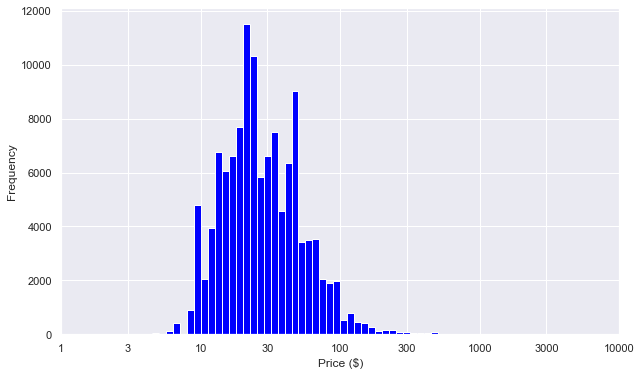

In [71]:
# Then, just show the price distribution on a log scale in chart
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = data_f1, x = 'price', bins=bin_edges, color = 'blue')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

### Exploration: 
+ Firstly, via the graph, clearly witness that up top shows a distribution that is roughly log-normal. <br></br>
+ Next, Around the 10 dollar level, there is a spike, and there is a definite peak at just over 20 dollar. Another peak can be found in wines that cost little over 50 dollar.

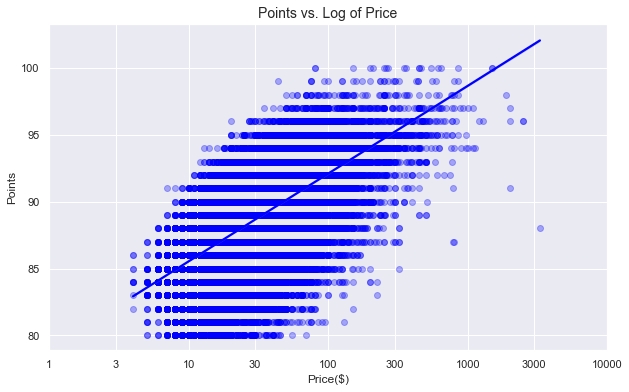

In [72]:
# Next, just plot a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=data_f1, color = 'blue', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

### Exploration: Clearly see that the scatterplot demonstrates that there is a correlation between points and price, with more costly wines typically receiving higher scores.

In [74]:
# Next, just have a look at the lowest priced wine
data_f1.loc[data_f1['price'].idxmin()]

country                                                    Spain
description    Berry and cherry aromas are surprisingly sturd...
points                                                        85
price                                                        4.0
province                                           Central Spain
region_1                           Vino de la Tierra de Castilla
title          Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety                                                    Syrah
winery                                               Felix Solis
year                                                        2013
Name: 1987, dtype: object

In [75]:
# Then, just display the highest priced wine
data_f1.loc[data_f1['price'].idxmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
points                                                        88
price                                                     3300.0
province                                                Bordeaux
region_1                                                   Médoc
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
year                                                        2013
Name: 80290, dtype: object

In [76]:
# show the related min country value
pd.options.display.max_colwidth = 500
data_f1[data_f1['price']==data_f['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery,year
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis,2013


In [77]:
# show the max country value
data_f1[data_f1['price']==data_f['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery,year
80290,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.",88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013


### Question 3 - Are certain wines of a greater caliber than others?

### Approach way: The plan is just compare the top 15 wine types and see how they score.

In [78]:
# Show the top 15 wines 
data_f1.variety.value_counts()[:15]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
Name: variety, dtype: int64

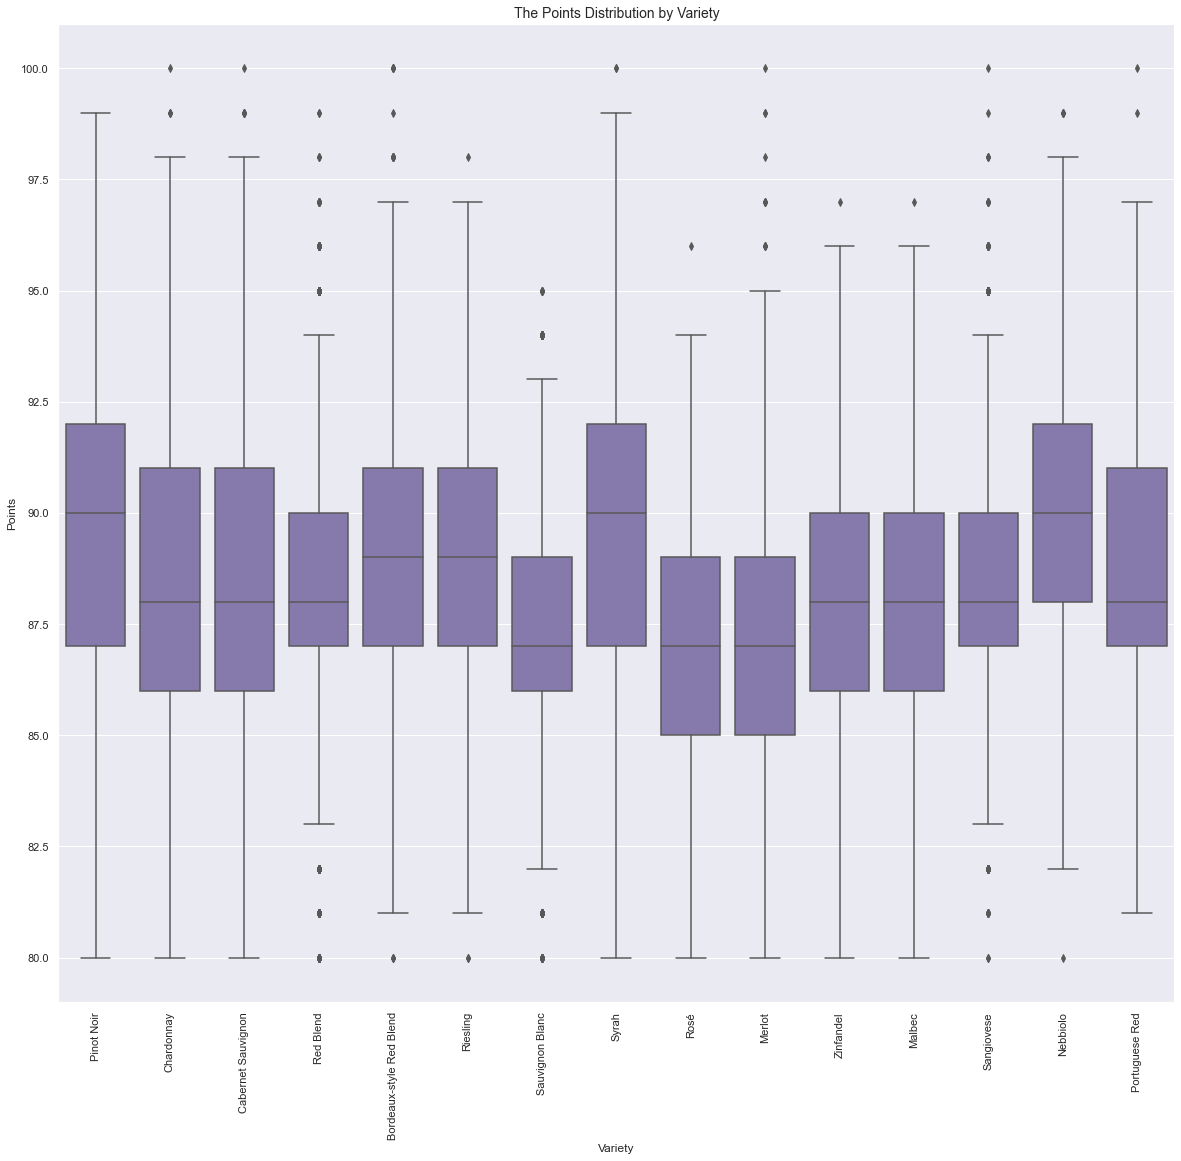

In [79]:
# show the boxplot of the top 15 most frequent wines 
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = data_f1, x = 'variety', y = 'points', color = base_color, order = data_f1.variety.value_counts().iloc[:15].index)
plt.title('The Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

### Exploration: 
+ Via the above chart, we can clearly observe that pinor noir typically performs the best with the highest average score when we plot the top 15 most popular wines in the dataset.

### QUESTION 4  - What wine falls into each price range's top tier?

**Define the related situation: The best wine for a calm evening at home when you don't need to impress anyone and simply want a decent bottle that won't break the bank.**    
**Price Range: Under $15**

In [80]:
# Show the price value <= 15 
cheap = data_f1[data_f1['price']<=15]

In [81]:
# Get the top 10 related values
cheap.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
19136,Spain,"A spectacularly sweet and rich bruiser, and one that delivers the essence of raisins, toffee and chocolate. This wine hasn't taken one turn south, and it's beckoning to be consumed. The finish is impeccably smooth and rich, and while its luscious to say the least, the amazing thing is its length, which runs a couple of minutes, no joke. A guarantee for anyone who loves the hedonistic combination of sweet fruit, brown sugar and chocolate.",94,14.0,Andalucia,Jerez,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry,Osborne,1827
23974,Portugal,"Assobio is from a single vineyard in the Quinta dos Murças estate. A powerful, structured expression of Douro wine, it has black fruits, dark tannins, some subtle layers of wood aging and great concentration. Dark and richly fruity, it needs to mature before drinking. Wait until 2017.",94,13.0,Douro,NaN,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças,2011
12255,South Africa,"This big boy greets us with his deep ruby/black cloak. Loaded with cassis from start to finish, there is tremendous fruit depth here and a full, supple mouthfeel. Reminiscent of one of the successful large-scale ‘97 California Cabernets. Has tannins to resolve, best held for a year or two.",93,15.0,Stellenbosch,NaN,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,Simonsig,1998
129572,France,"It's hard to believe it's possible to buy this quality rosé for so little money. Mouthwatering scents of raspberry, stone fruit and crushed stone emerge from the glass, followed by rich, ripe fruit flavors balanced by just-enough citrusy acidity. It's full-bodied and plush, yet vibrant and long on the finish.",93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
37882,Australia,"Writes the book on how to make a wine filled with gigantic jammy fruit that's nonetheless dry, balanced and harmonious. The Cabernet contributes blackcurrants and structural tannins. The Syrah brings a peppery richness, while Merlot adds soft fruitiness. You can actually taste each varietal, yet the wine hangs together, dry and rich. Best Buy.",93,15.0,Australia Other,South Eastern Australia,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend,Marquis Philips,2000
74042,France,"It's hard to believe it's possible to buy this quality rosé for so little money. Mouthwatering scents of raspberry, stone fruit and crushed stone emerge from the glass, followed by rich, ripe fruit flavors balanced by just-enough citrusy acidity. It's full-bodied and plush, yet vibrant and long on the finish.",93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
52776,US,"Uvaggio is making a serious case for Lodi Vermentino. This bottling is compelling: savory with herb and green olive notes, and yet freshly fruity and delicate, well integrated and plenty acidic to stand up to a wide range of food, even given its modest 11% alcohol level. A stunner that'll keep you thinking, and asking for more.",93,14.0,California,Lodi,Uvaggio 2009 Vermentino (Lodi),Vermentino,Uvaggio,2009
43193,US,"This is a very sweet, unctuous dessert wine, with the flavor and texture of honey. Made from Viognier, it has decadent apricot, peach, tangerine and crème brûlée notes that combine in a dense, delicious mélange.",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier,Novy,2006
9609,France,"A rich, Port-like wine that is full and concentrated while also soft and fruity. It is powerfully structured, with a balance of great acidity to balance the dry tannins, imparting a fine texture. An impressive wine that will need many years to age. Drink from 2017.",93,13.0,Southwest France,Cahors,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot,Château Vincens,2011
59823,US,"This is a very swee

#### Exploration: clearly witness that via choosing a quality Portuguese Quinta dos Murças 2011 Assobio Red will get you a 94 point wine for just 13 dollar with (Douro).

**Situation 2: Best wine to take to a dinner party or to give as a gift.**    
**Price Range: Between the range of 15 and 30 dollars**

In [83]:
low_mid = data_f1.query("price > 15 and price <=30")
low_mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
54311,Austria,"This wines arrives on tiptoe, citrus-scented and fresh, but once it expands on your palate it soon fills the mouth with all manner of stone fruits. As befits this vintage, everything is tempered with grapefruit zestiness but both mirabelle and apricot richness not only lend flavor but also a beautiful texture that insinuates quince and blood orange zest. What a triumph, what a marvel. Irresistible now but with incredible concentration this is built to last. Drink now till 2020 at least.",96,28.0,Kamptal,NaN,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling,Eichinger,2014
81902,US,"This is as good as the best from California—textural, creamy, a delicious mix of lemon custard, meringue, caramel, papaya and toasted coconut. At one quarter the price of comparable bottles, this young wine just seduces from the instant it hits the tongue.",96,30.0,Washington,Columbia Valley (WA),Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay,Efeste,2009
45992,France,"With its apricot and honeyed flavors, this is a rich wine. It has intense, ripe fruit and layers of spice and botrytis. A dry core gives it its great richness and aging potential. Drink from 2024.",96,28.0,Bordeaux,Sauternes,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,2014
102489,US,"Even if winemaker Jason Lett tripled the price of this wine, it would still be a standout among its peers. This opens with intense aromatics of pineapple fruit, bracing acidity and compelling length. On the second and third day after opening, it remained quite fresh and expressive, with further details of fruit and mineral beginning to emerge. Drink now through 2035.",96,27.0,Oregon,Dundee Hills,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay,The Eyrie Vineyards,2014
119658,Spain,"One of the world's best PX wines is Solera 1927, the pride of Alvear. Whatever solera stocks went into this bottling were well selected. Aromas of maple and fine wood turn to fig and caramel. Saturation and weight on the palate are expected, but this has some (though not a lot) acidic cut. Deep flavors of fig and Nutella finish with nuttiness and warmth. Drink or hold.",96,30.0,Andalucia,Montilla-Moriles,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez,Alvear,1927
101580,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,2007
9901,France,"A touch of lemon balm adds a breezy freshness to the nose, while a pure, bright and precise notion of ripe lemon pervades and takes over the entire palate. On its fringes, delicious hints of chamomile and chervil appear alongside ripe red apple. This is a tantalizing charmer in spite of its absolute dryness and vivid acidity. Drink 2017–2037.",96,29.0,Alsace,Alsace,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling,Domaines Schlumberger,2014
40309,Italy,"This stunning Chianti Classico has an intense perfume of violet, rose and iris, accented with scents of truffle and forest berry. The wildly delicious palate presents a core of juicy cherry layered with sweet pipe tobacco, mint and spice, with a hint of well-integrated oak. It has great energy, with vibrant acidity and bracing but refined tannins. Drink 2016–2025.",96,27.0,Tuscany,Chianti Classico,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,2010
109845,US,"This ultra reserve, made in half bottles only, is labeled the winery's best offering. It lives up to the claim, with stunningly rich and broad flavors of black fruits, dusty cedar, tob

### Exploration: If you don't mind spending a bit extra money, there is a superb selection of wines here. A 20 dollar Syrah from the US achieving a whopping 96 points would be the finest value.

**Situation 3: Buy a bottle of wine that is reasonably priced for you and them.**    
**Price Range: About the range of 30 and 50 dollars**

In [82]:
# show the related values
mid = data_f1.query("price > 30 and price <=50")
mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
118059,US,"Shows classic, full-throttle notes of tropical and citrus fruits, pears and sweet green apples, combined with strong minerality and complex layers of buttered toast, honey and creamy lees. The description alone hardly does justice to the wine's beauty. The acidity is perfect, the oak deftly applied, the finish long and completely satisfying. Winemaker Ehren Jordan suggests pairing it with simple fare like roast chicken and salted fingerling potatoes.",99,44.0,California,Sonoma Coast,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,Failla,2010
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 22% Merlot, 9% Cab Franc and 6% Petit Verdot. Full and magnificently rich, it is loaded with dense and thrilling fruit flavors of black cherry and cassis. A streak of iron and a hint of citrus keep the wine evolving through a long, beautifully balanced finish. Retasted after being open for 24 hours, the wine was as fresh and thrilling as on the first day.",98,50.0,Washington,Columbia Valley (WA),Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Pirouette,2008
47432,US,"This wine shows real first-growth quality in its intensity and concentration, with orange nectar, golden mango, pear, peach pie, buttercream, vanilla, buttered toast and spice flavors. The balance is exquisite, and the way the acids dance along the palate make the wine clean and lively.",97,50.0,California,Russian River Valley,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay,Williams Selyem,2010
4504,US,"This wine is insanely good, from a dry-farmed, yes, rocky outcropping of vines planted first in 1910, then again in 1934 and the 1970s, with Carignane and Petite Sirah in the mix. It's thick, rich and beautifully put-together, full bodied and entirely balanced, with markings of cherry cordial and white pepper that seduce gently.",97,50.0,California,Russian River Valley,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel,Limerick Lane,2013
114981,US,"A seriously top of the heap California Syrah. This complex, interesting wine sings of black pepper and garrigue, fleshy in just-ripe cherry, leather and dark plum. From the mountainous Fenaughty Vineyard, always a good source, it finishes long and will age gorgeously if you can possibly wait to drink it; that pepper will mellow in interesting ways.",97,35.0,California,El Dorado,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,Donkey & Goat,2010
45986,France,"Powered by intense botrytis, this wine is opulent and ripe, with spice, yellow fruit and honey flavors. It has just the right balance of acidity to maintain its shape and proportions. It's likely to age well over many years. Drink from 2024.",97,45.0,Bordeaux,Barsac,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet,2014
125831,US,"The cold and fog actually helped this Chardonnay, which achieves a remarkable delicacy and tartness despite the power of its fruit. Really remarkable for the flood of golden mango, Asian pear and Key lime pie richness, which is grounded by a firm minerality. Oak influence and aging on the lees lend the perfect touches of smoky, buttered toast and zesty creaminess to this dry, polished wine. A mere 587 cases were produced.",97,50.0,California,Green Valley,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay,Dutton-Goldfield,2010
16524,Portugal,"This is a superb blend of aged tawny Ports, blended to celebrate the company's 325th anniversary. Filled with rich fruit, it has great depth and spicy richness although it is also impressively fresh. Dried fruits and red plums are lifted with a hint of smoky wood and good acidity. Like any tawny Port, it is ready to drink.",97,40.0,Port,NaN,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate,325
128268,US,"A monumental Cabernet that succeeds on every

### Exploration : Clearly see that a wine scoring 99 points for only 44 dollars is a great choice if you enjoy Chardonnay and want to reward yourself and your dinner guests.

**Next Situation: Whether the buget is no object because wine is the life with some drunk people.**    
**Price Range: just more than 50 dollar**

In [84]:
# Show the related high price values
high = data_f1.query("price > 50")
high.sort_values(by='points', ascending=False)[:20]

,country,description,points,price,province,region_1,title,variety,winery,year
113929,US,"In 2005 Charles Smith introduced three high-end Syrahs. In 2006 Smith has made a wine better than each of these, by combining them into a single wine—Royal City Syrah. Rich scents of purple fruit, smoked meat, cedar, lead pencil, moist earth and so on proclaim a wine with genuine gravitas. There is nothing missing, from the first sniff to the last sip, the wine delivers on all levels. Complex, beautifully balanced, powerful and detailed.",100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah,Charles Smith,2006
111755,France,"This is the finest Cheval Blanc for many years. It is, quite simply, magnificent. The wine shows the greatness of Cabernet Franc in the vintage, with 57% of the variety in the blend. It is beautifully structured and perfumed, with velvety tannins, balanced acidity and swathes of black-currant and black-cherry fruits. It's well on course to becoming a legendary wine.",100,1500.0,Bordeaux,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,2010
89728,France,"This latest incarnation of the famous brand is a superb wine. It is on par with, maybe even better than, the already legendary 2002. Its balance is impeccable: Apple and citrus flavors working with the tight minerality to give a textured yet fruity wine. Produced from Roederer's own vineyards which are mainly biodynamic, the wine has its own intense purity and crispness. It has amazing potential and is likely to age for many years. Drink from 2020.",100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,Louis Roederer,2008
123545,US,"Initially a rather subdued Frog; as if it has been tamed down. Then, suddenly, There's a plush core of blackberry fruit, and the classic Cayuse funkiness is there, drenched in liquid rocks and cured meat and drying tannins. It's all in proportion and a fine reflection of the steely vintage. As it opens gracefully you discover that it is a stunningly refined Frog, quite possibly the best ever; powerful and distinctive, but also elegant, feminine.",100,80.0,Washington,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,Cayuse,2008
118058,US,"This wine dazzles with perfection. Sourced from vineyards throughout Sonoma County, it refutes the belief that a great Cabernet must come from a single vineyard. It does not. The master's art of blending, coupled with demanding vineyard practices lends completeness. The blend is 85% Merlot, 10% Cabernet Franc and 5% Malbec, making it an extraordinary success despite the absence of Cabernet Sauvignon. Give credit to winemaker Pierre Seillan. The wine itself is absolutely dry. It starts with a...",100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,2007
89729,France,"This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.",100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay,Salon,2006
45781,Italy,"This gorgeous, fragrant wine opens with classic Sangiovese scents of violet, rose, perfumed red berry, new leather and a whiff of baking spice. The elegant, radiant palate delivers crushed Marasca cherry, ripe strawberry, cinnamon, black tea and a hint of pipe tobacco. Firm, ultrafine tannins and bright acidity offer an age-worthy structure and impeccable balance. It's already stunning but will evolve for decades. Drink 2020–2050.",100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese,Biondi Santi,2010
111753

### Exploration : in this situation, clearly witness that By purchasing the Charles Smith 2006 Royal City Syrah, you can sample what 100 points taste like for the reasonable price of 80 dollar. 

<a id='conclusions'></a>
## Conclusions



### After implementing this project, i do have explore some valuable insights that really have a useful target for making some recommendations with people who are fonding of the field of Wine and even other wine drinks.
- Firstly, On average, England produces Superb wine. The typical suspects—France, Italy, Portugal, the US, or Australia are where to look for a bottle that receives a flawless 100 rating.
- Secondly, Price and quality are connected. But if you know where to search, you might get a 4 dollar bottle of wine that rates just 3 points worse than a 3,300 dollar bottle.
- Third, all wine kinds are fair game, but I'm going with Pinot Noir.
- Fourth, very circumstance and price range can find the ideal wine, and each category features notable performers.
- Fifth, In wine evaluations, some phrases are frequently used. Vinojargon can be learned, just like any other language.

## Some other related reference resources for implementing 

There are some useful resources for completing this project effectively including: <br></br>
https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv           
https://www.winemag.com        
https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot       
https://stackoverflow.com/questions/20443846/python-pil-nameerror-global-name-image-is-not-defined     
https://www.geeksforgeeks.org/python-docstrings/